In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as rnd
import math as m
import pandas as pd
import scipy.stats as stat
import seaborn as sb
from scipy.integrate import quad
from scipy.integrate import dblquad
from scipy.special import comb


expon = lambda n: stat.gamma(n, loc = 1)
my_norm = lambda exp, disp: stat.norm(loc = exp, scale = m.sqrt(disp))

$\theta_1 = \overline{X} \quad \theta_2 $ - оценка Ходжеса-Лемана

$\mathbb{E} (\widehat{\theta_2} - \theta)^2 
=
\mathbb{E} \big(\overline{X} + \tfrac{\frac{1}{2} - \overline{X}}{1 + \sqrt{n}} - \theta \big)^2
=
\mathbb{E} \big(\overline{X} \dfrac{\sqrt{n}}{1 + \sqrt{n}} - \theta + \dfrac{1}{2 + 2 \sqrt{n}} \big)^2 =$

$= \mathbb{E} \big(\overline{X} \dfrac{\sqrt{n}}{1 + \sqrt{n}}\big)^2 +
\theta^2 + \dfrac{1}{4n + 4 + 8 \sqrt{n}} -
2\dfrac{\sqrt{n}}{\sqrt{n} + 1} \theta \mathbb{E} \overline{X} -
\theta \dfrac{1}{1 + \sqrt{n}} + 
\dfrac{\sqrt{n}}{1 + n + 2\sqrt{n}} \mathbb{E} \overline{X} 
=$

$\cdots$

$= \dfrac{0.25}{(1 + \sqrt{n})^2}$

for theta = 0.1 and n = 10
theta2 is better 33 percent of the time
for theta = 0.1 and n = 50
theta2 is better 20 percent of the time
for theta = 0.1 and n = 100
theta2 is better 33 percent of the time


for theta = 0.5 and n = 10
theta2 is better 81 percent of the time
for theta = 0.5 and n = 50
theta2 is better 90 percent of the time
for theta = 0.5 and n = 100
theta2 is better 87 percent of the time


for theta = 0.8 and n = 10
theta2 is better 36 percent of the time
for theta = 0.8 and n = 50
theta2 is better 40 percent of the time
for theta = 0.8 and n = 100
theta2 is better 39 percent of the time




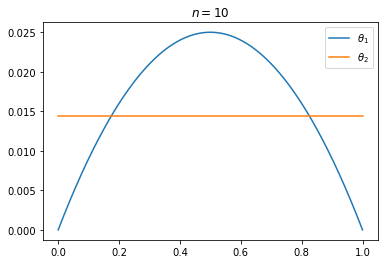

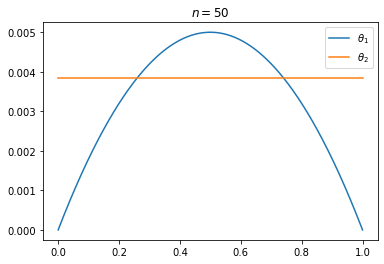

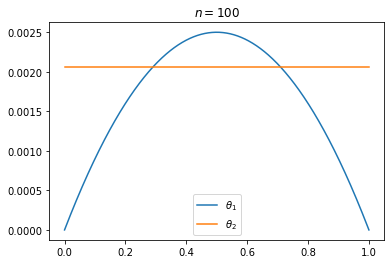

In [23]:
x = np.linspace(0, 1, 1000); samplesize = 100

for theta in [0.1, 0.5, 0.8]:
    for n in [10, 50, 100]:
        onebetter = 0; twobetter = 0;
        for i in range(samplesize):
            sample = stat.bernoulli(theta).rvs(n)
            theta1 = sample.mean()
            theta2 = theta1 + (0.5 - theta1) / (1 + m.sqrt(n))
            
            if (abs(theta1 - theta) > abs(theta2 - theta)):
                twobetter += 1
            else:
                onebetter += 1
                
        print("for theta = " + str(theta) + " and n = " + str(n))  
        print("theta2 is better " + str(twobetter) +" percent of the time")
    print("\n")
            
for n in [10, 50, 100]:
    plt.title("$n =$" + str(n))
    plt.plot(x, (1 - x) * x / n, label = "$\\theta_1$")
    plt.plot(x, [0.25 / (1 + m.sqrt(n))**2 for i in range(1000)], label = "$\\theta_2$")
    plt.legend()
    plt.show()
    

    

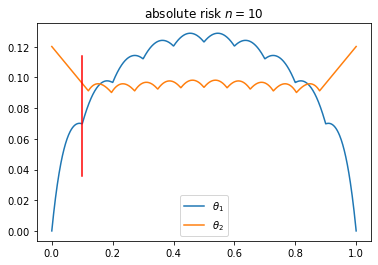

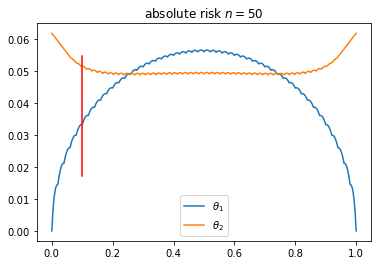

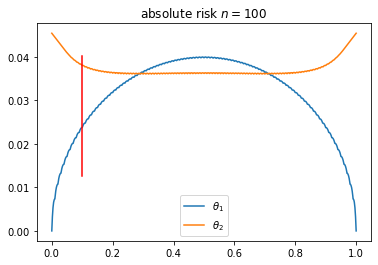

In [6]:
x = np.linspace(0, 1, 1000); samplesize = 100


def abs_r1(theta):
    sum = 0;
    for k in range(n+1):
        sum += abs(k/n - theta) * comb(n, k) * theta**k * (1 - theta)**(n - k)
    return sum;

def abs_r2(theta):
    sum = 0;
    for k in range(n+1):
        sum += abs(k * m.sqrt(n)/(1 + m.sqrt(n)) / n + 0.5 / (1 + m.sqrt(n)) - theta) * comb(n, k) * theta**k * (1 - theta)**(n - k)
    return sum;

for n in [10, 50, 100]:
    plt.title("absolute risk $n =$" + str(n))
    plt.plot(x, abs_r1(x), label = "$\\theta_1$")
    plt.plot(x, abs_r2(x), label = "$\\theta_2$")
    plt.axvline(0.1, ymin = 0.3, ymax = 0.85, color = 'red')
    plt.legend()
    plt.show()